### sources and citations

https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard (feature engineering)
https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python#1.-So...-What-can-we-expect? (data skew)
https://www.kaggle.com/code/juliencs/a-study-on-regression-applied-to-the-ames-dataset/notebook (gradient boosting and other models)
https://www.kaggle.com/code/dansbecker/submitting-from-a-kernel (how-to guide)

analyticsvidhya.com

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#output of floats limited to 3 decimal places
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

### Loading the Dataset

In [2]:
train_df = pd.read_csv('/Users/khana/Desktop/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/Users/khana/Desktop/house-prices-advanced-regression-techniques/test.csv')

print("Full train dataset shape is {}".format(train_df.shape))

Full train dataset shape is (1460, 81)


Training Data

In [3]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Testing Data

In [4]:
test_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


The ID column is unncessary

In [5]:
#Saving ID column
train_ID = train_df['Id']
test_ID = test_df['Id']

#Removing ID column
train_df = train_df.drop('Id', axis=1)
test_df = test_df.drop('Id', axis=1)
train_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


Looking at the types of data in the dataset

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Looking at how the prices are distributed

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

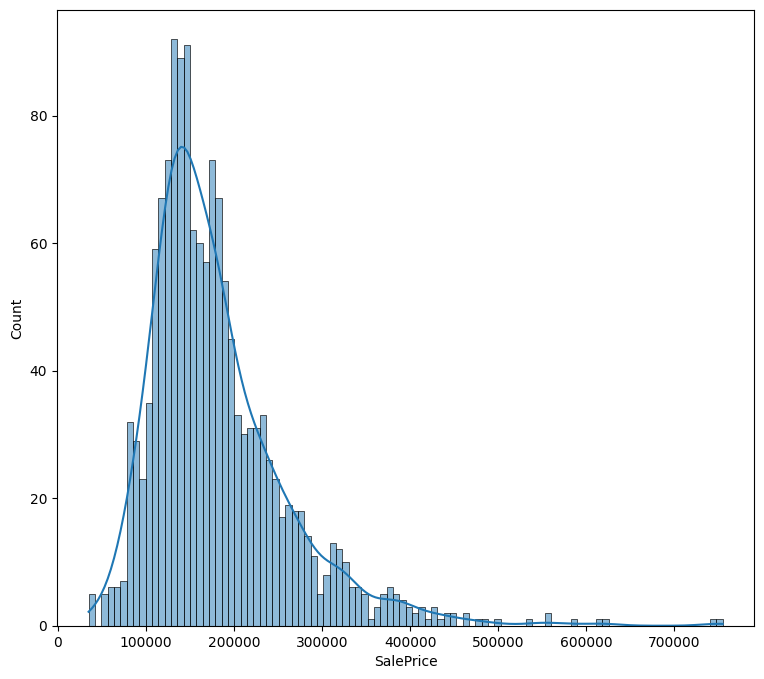

In [7]:
print(train_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(train_df['SalePrice'], bins=100, kde = True)

numerical data overview

In [8]:
list(set(train_df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [9]:
df_num = train_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.000,8450,7,5,2003,2003,196.000,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.000,9600,6,8,1976,1976,0.000,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.000,11250,7,5,2001,2002,162.000,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.000,9550,7,5,1915,1970,0.000,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.000,14260,8,5,2000,2000,350.000,655,0,...,192,84,0,0,0,0,0,12,2008,250000


feature distribution plotting

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

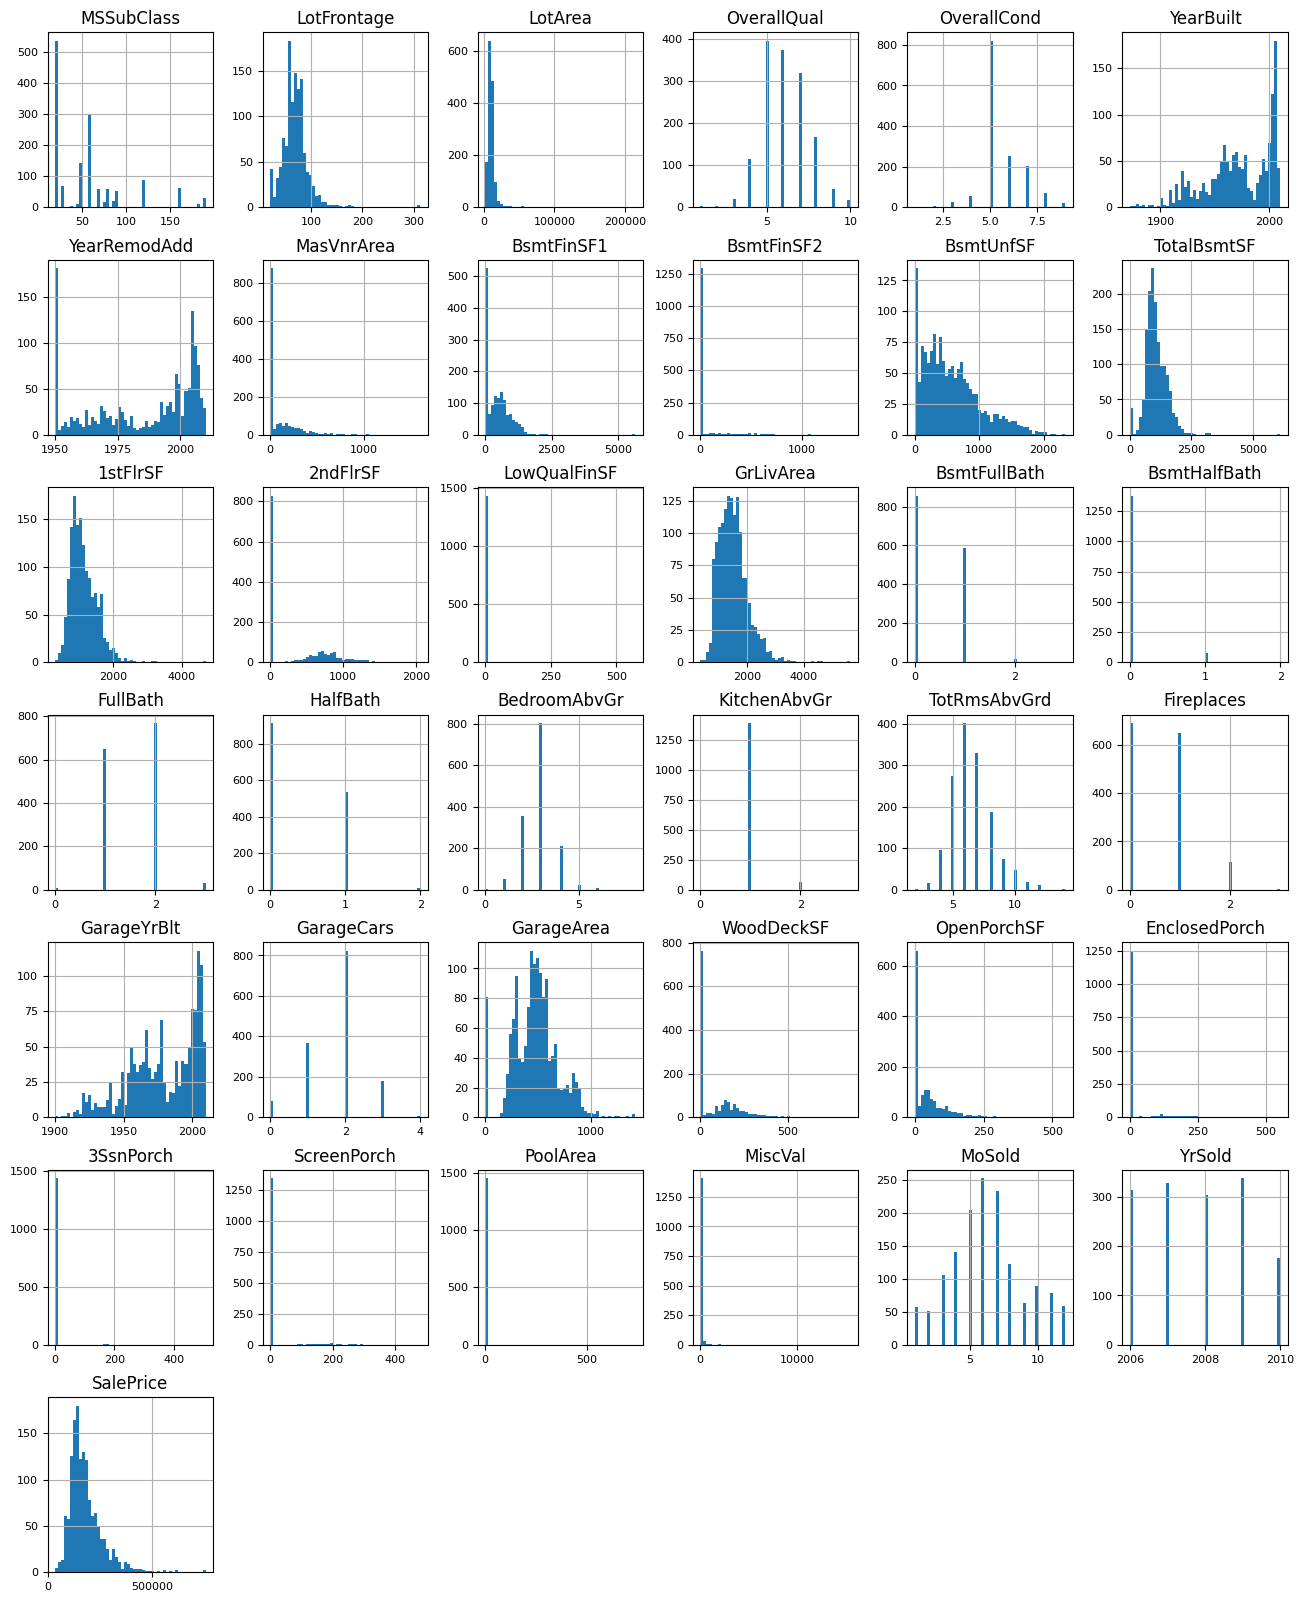

In [10]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

dataset tells us there are outliers

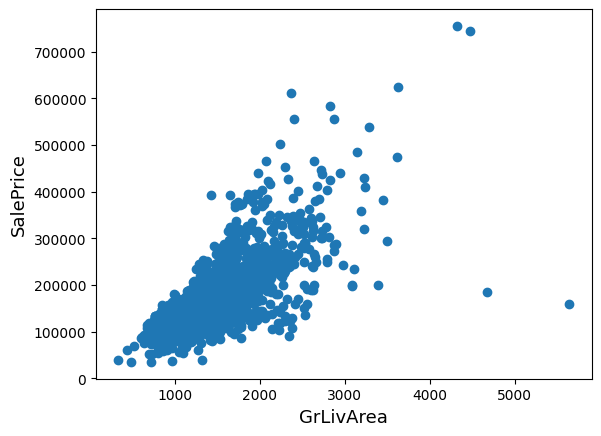

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Remove major 2 outliers

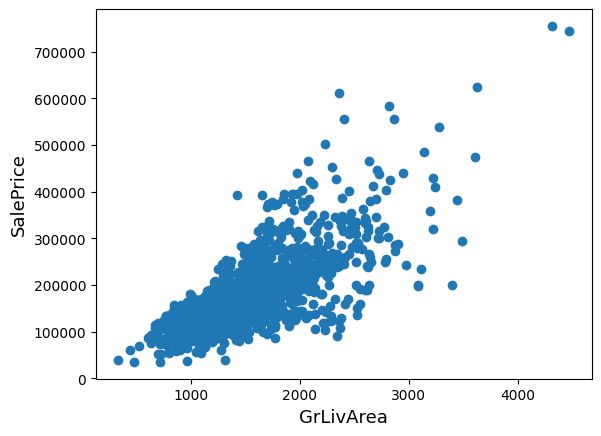

In [12]:
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index)

#Checking graphic again
fig, ax = plt.subplots()
ax.scatter(train_df['GrLivArea'], train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

observing correlation matrix

/var/folders/vx/4m9qq3jx4nx9zym2r74lm2rh0000gn/T/ipykernel_76742/3571016787.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train_df.corr()


<AxesSubplot:>

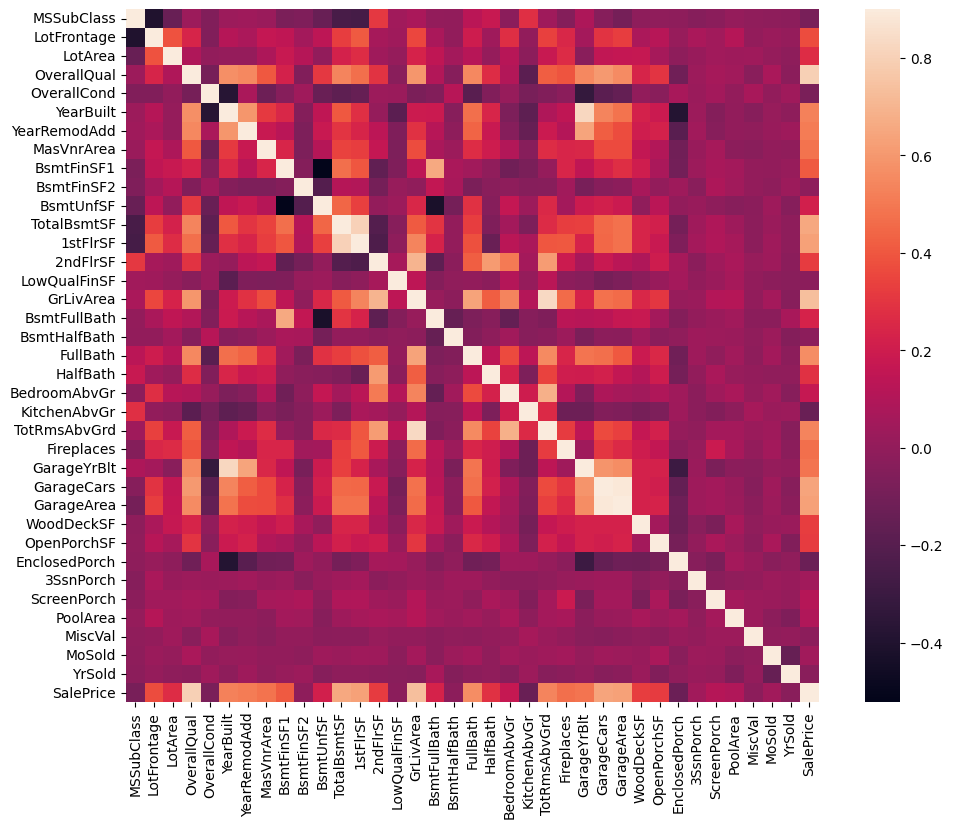

In [13]:
corrmat = train_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

There could be multicollinearity with 'GarageArea' and 'GarageCars', as well as 'TotalBsmtSF' and '1stFlrSF'.

'GrLivArea', 'TotalBsmtSF', and 'OverallQual' show strong correlation with 'Sale Price'

Now we look at the correlation matrix zoomed heatmap style.

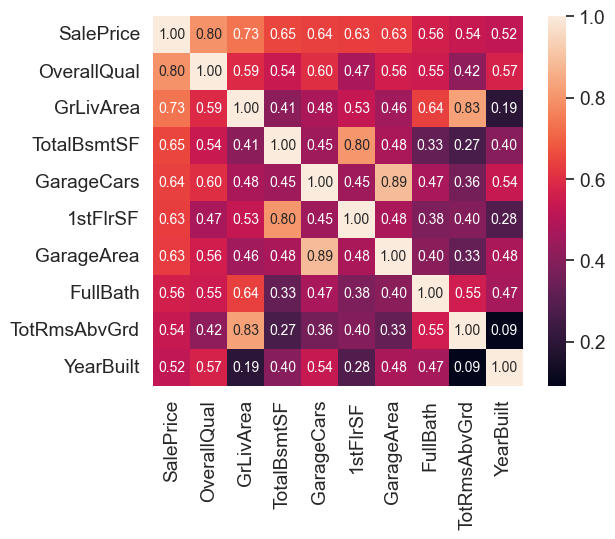

In [14]:
k = 10 #no. of heatmap variables
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* Out of both, GarageCars is more correlated so we keep it. It is also correlated with GarageArea (observable)

* 'TotalBsmtSF' and '1stFlrSF' also correlated. Keeping 'TotalBsmtSF'.

Observing the correlated variables scatter plots

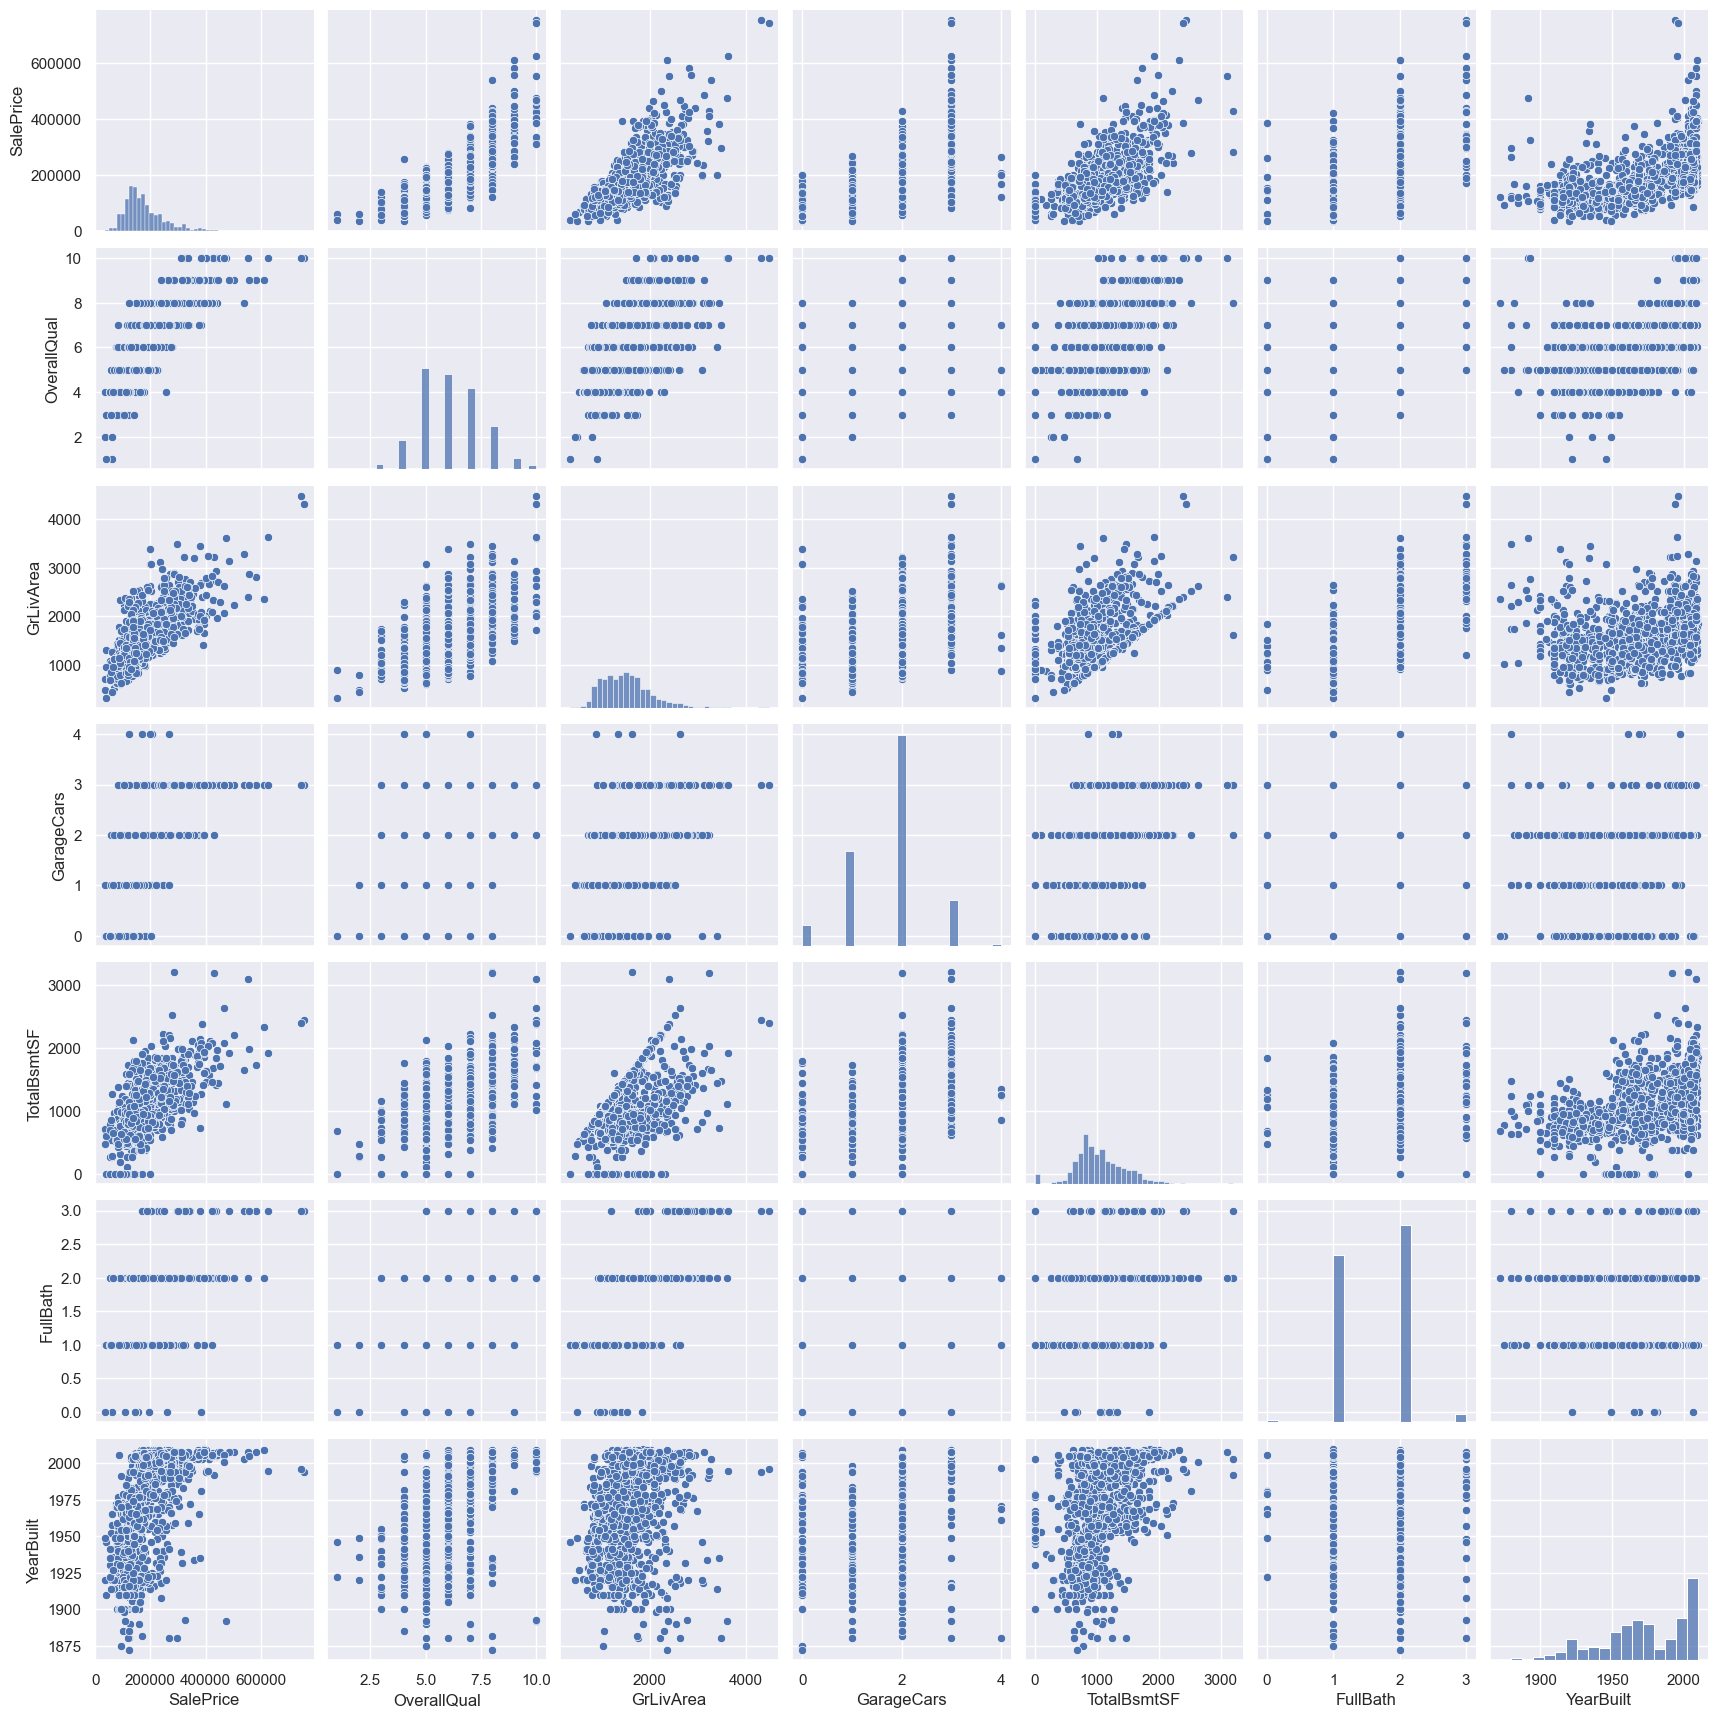

In [15]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], height = 2.5)
plt.show()

TotalBsmtSF and GrLivArea form diagonal line, most data point falling below the line. This is predicted as BsmtSF should be same or less compared to abve ground SF. 




- important features relative to target

In [16]:
# Finding key features relative to target
print("Find key features relative to target")
corr = train_df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)
corrValues = corr.SalePrice.to_frame()

Find most important features relative to target
SalePrice        1.000
OverallQual      0.796
GrLivArea        0.735
TotalBsmtSF      0.651
GarageCars       0.641
1stFlrSF         0.632
GarageArea       0.629
FullBath         0.562
TotRmsAbvGrd     0.538
YearBuilt        0.524
YearRemodAdd     0.508
GarageYrBlt      0.487
MasVnrArea       0.483
Fireplaces       0.470
BsmtFinSF1       0.409
LotFrontage      0.371
WoodDeckSF       0.325
OpenPorchSF      0.321
2ndFlrSF         0.321
HalfBath         0.285
LotArea          0.268
BsmtFullBath     0.228
BsmtUnfSF        0.214
BedroomAbvGr     0.168
ScreenPorch      0.111
PoolArea         0.099
MoSold           0.046
3SsnPorch        0.045
BsmtFinSF2      -0.011
BsmtHalfBath    -0.017
MiscVal         -0.021
LowQualFinSF    -0.026
YrSold          -0.029
OverallCond     -0.078
MSSubClass      -0.084
EnclosedPorch   -0.129
KitchenAbvGr    -0.136
Name: SalePrice, dtype: float64


/var/folders/vx/4m9qq3jx4nx9zym2r74lm2rh0000gn/T/ipykernel_76742/3721330852.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


Assuming anything with Pearson correlation coefficient of [-0.2, 0.2] is negligible. 

In [17]:
undesirable = corrValues.loc[(corrValues['SalePrice'] < 0.2) & (corrValues['SalePrice'] > -0.2)]

In [18]:
#consolidating training and testing data into one dataframe
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
y_train_df = train_df.SalePrice
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is: " + str(all_data.shape))

all_data size is: (2917, 79)


Removing unwanted features

In [19]:
col_list = undesireable.index.values.tolist()
all_data.drop(columns=col_list, inplace=True)
print("all_data size is: " + str(all_data.shape))

all_data size is: (2917, 65)


missing data fix

In [20]:
count_nan_in_df = all_data.isnull().sum().sum()
print (count_nan_in_df)

13955


In [21]:
#ratios for missing data
total = all_data.isnull().sum().sort_values(ascending=False)
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.concat([total, all_data_na], axis=1, keys=['Total', 'Percent'])[:32]
missing_data.head(20)

,Total,Percent
PoolQC,2908,99.691
MiscFeature,2812,96.400
Alley,2719,93.212
Fence,2346,80.425
FireplaceQu,1420,48.680
LotFrontage,486,16.661
GarageYrBlt,159,5.451
GarageCond,159,5.451
GarageQual,159,5.451
GarageFinish,159,5.451


Text(0.5, 1.0, 'Percent missing data by feature')

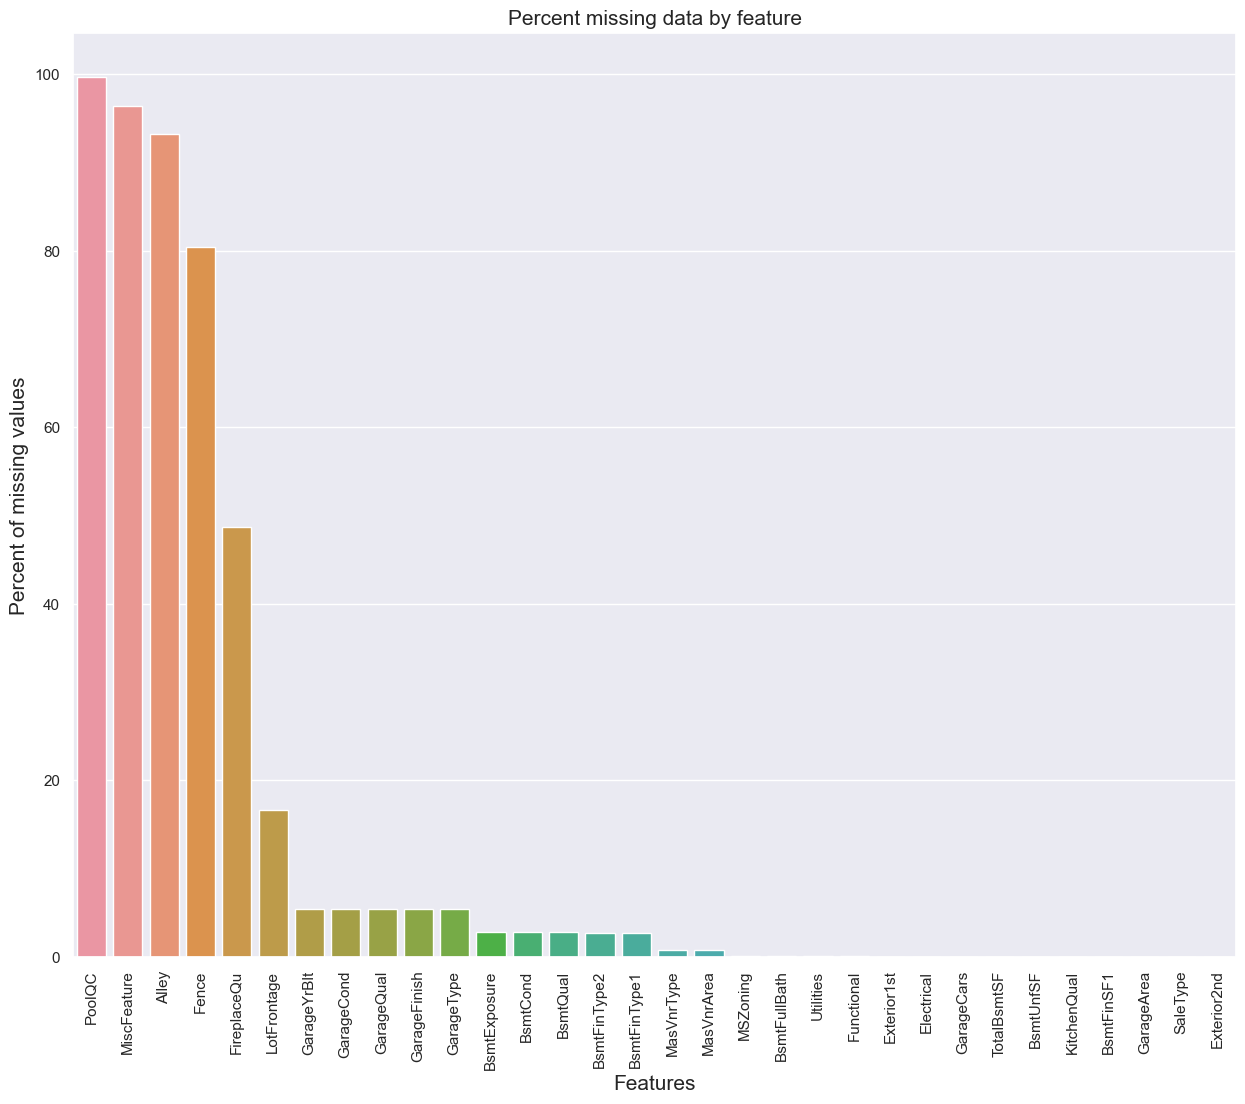

In [22]:
#creating graph for missing data
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [23]:
# PoolQC: NA = "No Pool".
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

# MiscFeature: NA = "no misc feature"
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

# Alley: NA = "no alley access"
all_data["Alley"] = all_data["Alley"].fillna("None")

# Fence: NA = "no fence"
all_data["Fence"] = all_data["Fence"].fillna("None")

# FireplaceQu: NA = "no fireplace"
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

# LotFrontage: Using median of LotFrontage, assuming they have similar area for all in the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# GarageType, GarageFinish, GarageQual and GarageCond: Replace any missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

# GarageYrBlt, GarageArea and GarageCars: Replace any missing data with 0 
# assuming no garage means no cars
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
# BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, BsmtFullBath: 
# missing values assumed to be 0
for col in ('BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath'):
    all_data[col] = all_data[col].fillna(0)
    
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
# MasVnrArea and MasVnrType: NA = no masonry veneer
# filling in None for type and 0 for area 
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

# general zoning classification, MSZoning
# RL = missing values
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

# Utilities: All records = "AllPub", exception for 1 "NoSewa" and 2 NA.
# Remove house with 'NoSewa' due to lack of use in predictive modelling here
# We can then safely remove it.
all_data = all_data.drop(['Utilities'], axis=1)

# Functional: NA = typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")

# Electrical: one NA value. 
# 'SBrkr' set to missing value as it is most common.
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

# KitchenQual: one NA value
# set most frequent 'TA' to missing value in KitchenQual.
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

# Exterior1st and Exterior2nd: one missing value. 
# substitute most common string.
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

# SaleType: Use most frequent which is "WD"
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

Checking remaining missing values

In [24]:
all_data.isnull().sum().sum()

0

One Hot encoding variables

In [25]:
# dropping misc feature as misc value is already dropped
all_data = all_data.drop('MiscFeature', axis=1)

#selecting categorical columns
cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 
        'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
        'PoolQC', 'Fence', 'SaleType', 'SaleCondition']

df_categorical = all_data[cols]
df_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,None,Attchd,RFn,TA,TA,Y,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,Y,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,Y,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,Y,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,Y,None,None,WD,Normal


In [26]:
# applying one hot encode categorical features and processing columns
all_data = pd.get_dummies(data=all_data, columns=cols, drop_first=True)
print(all_data.shape)

(2917, 239)


Summing square footage for each house.

In [27]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
print(all_data.shape)

(2917, 240)


New train and test sets

In [28]:
# train_df = all_data[:ntrain]
# train_df["SalePrice"] = y_train_df.values
# test_df = all_data[ntrain:]

### normalizing data by preprocessing

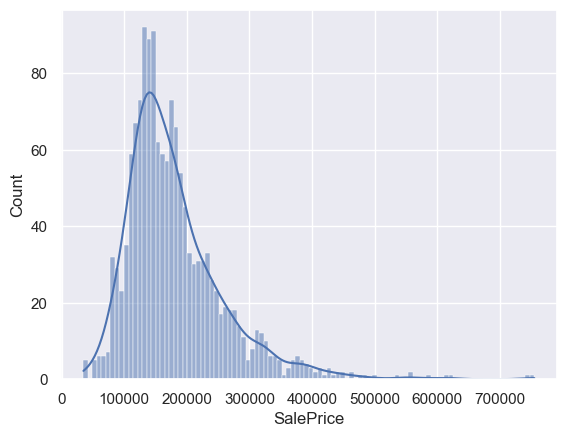

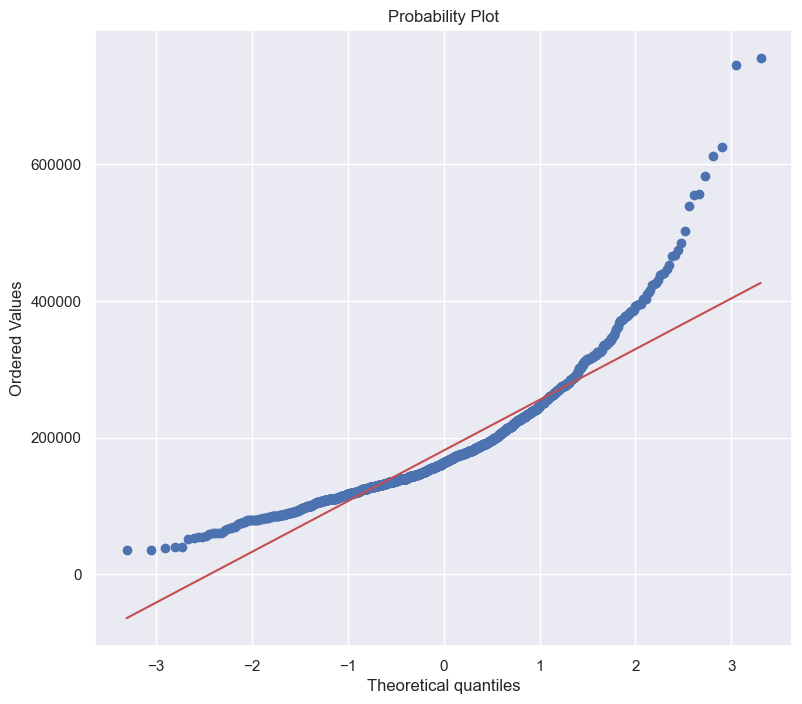

In [29]:
from scipy.stats import norm
from scipy import stats

sns.histplot(y_train_df, bins=100, kde = True)
fig = plt.figure(figsize=(9, 8))
res = stats.probplot(y_train_df, plot=plt)

applying log transform

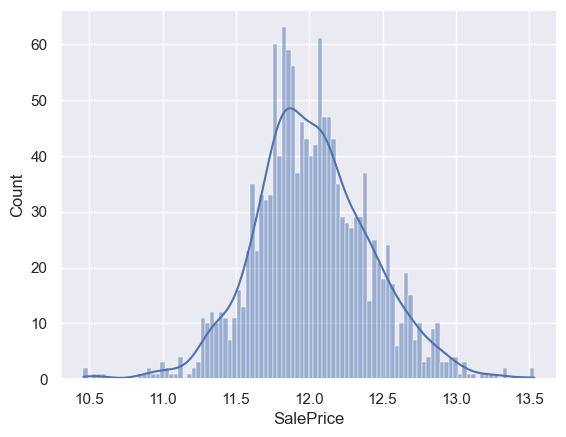

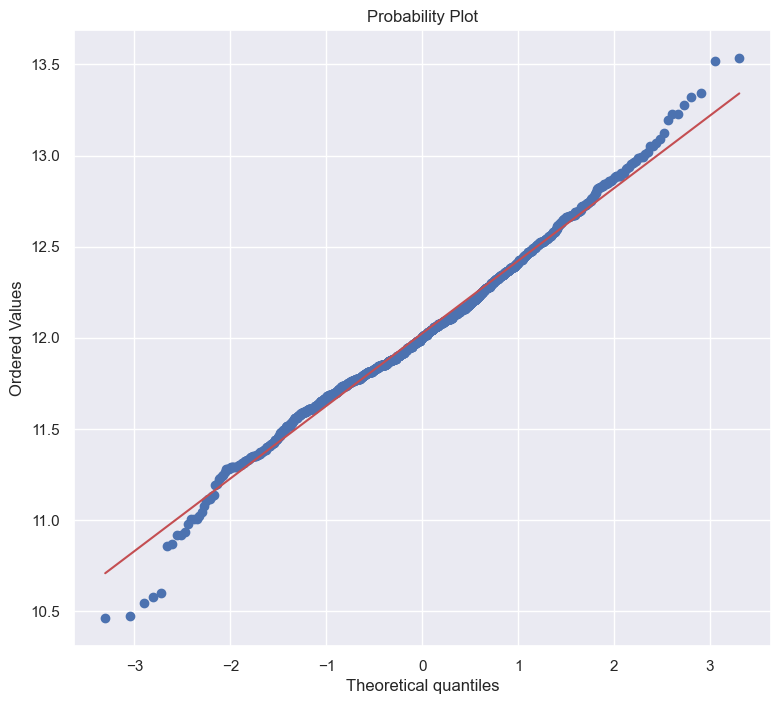

In [30]:
y_train_df = np.log(y_train_df)

sns.histplot(y_train_df, bins=100, kde = True)
fig = plt.figure(figsize=(9, 8))
res = stats.probplot(y_train_df, plot=plt)

checking GrLivArea

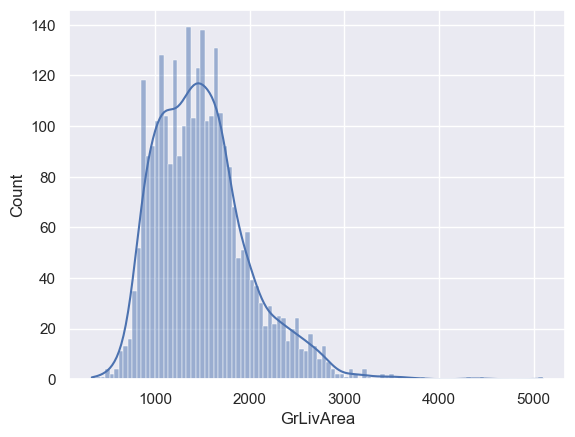

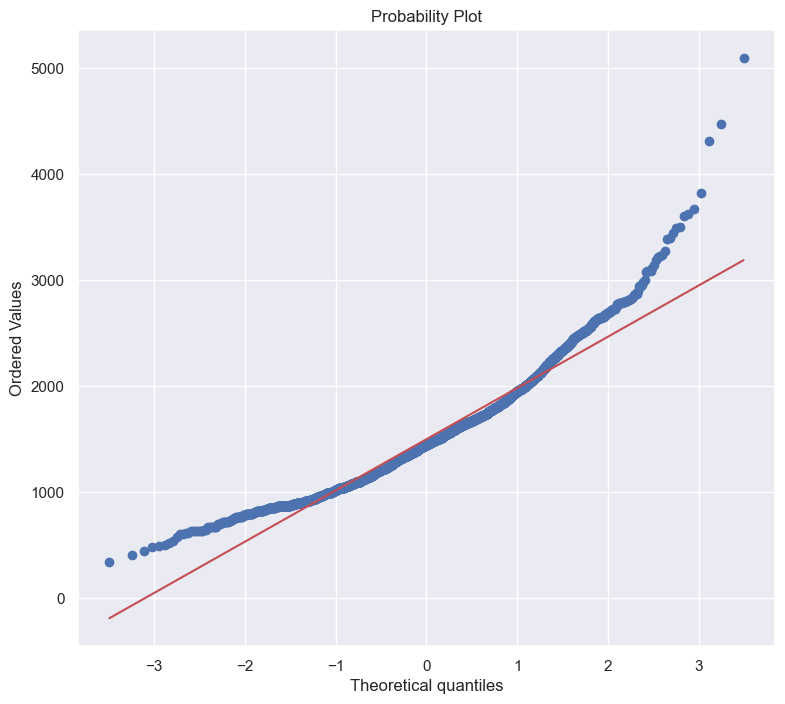

In [31]:
sns.histplot(all_data['GrLivArea'], bins=100, kde = True)
fig = plt.figure(figsize=(9, 8))
res = stats.probplot(all_data['GrLivArea'], plot=plt)

check log transform

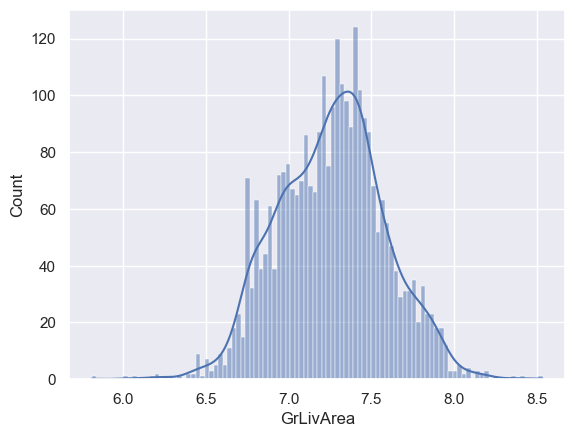

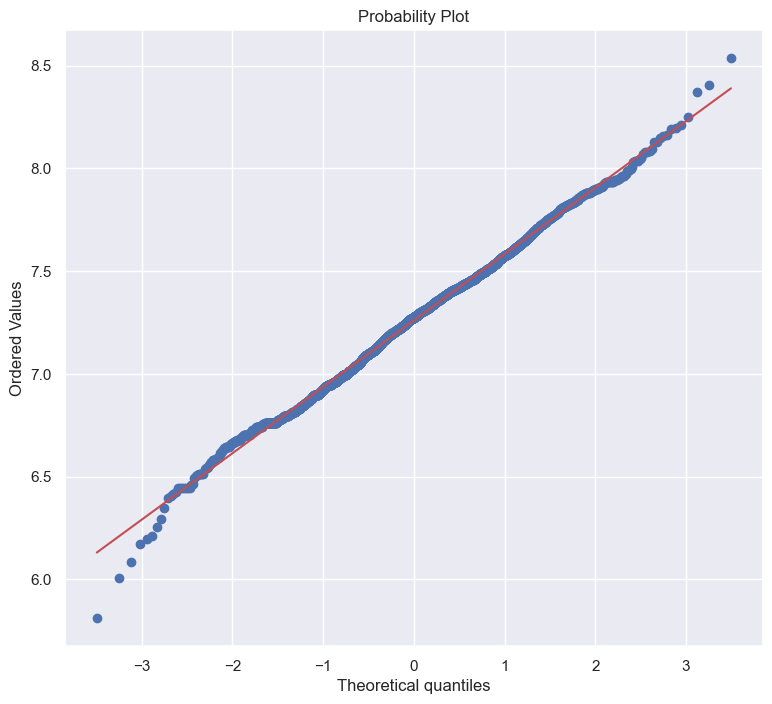

In [32]:
all_data['GrLivArea'] = np.log(all_data['GrLivArea'])

sns.histplot(all_data['GrLivArea'], bins=100, kde = True)
fig = plt.figure(figsize=(9, 8))
res = stats.probplot(all_data['GrLivArea'], plot=plt)

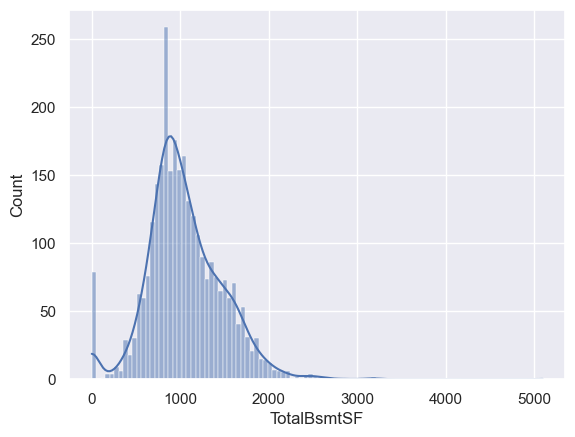

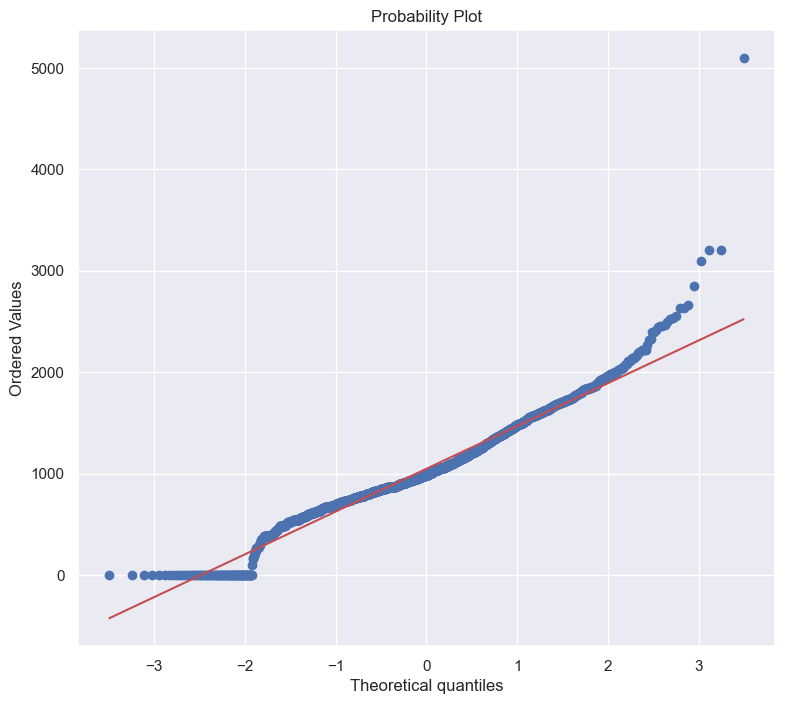

In [33]:
sns.histplot(all_data['TotalBsmtSF'], bins=100, kde = True)
fig = plt.figure(figsize=(9, 8))
res = stats.probplot(all_data['TotalBsmtSF'], plot=plt)

isolating zero values.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


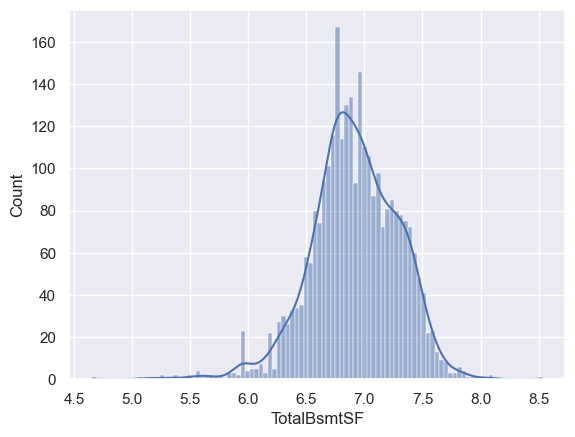

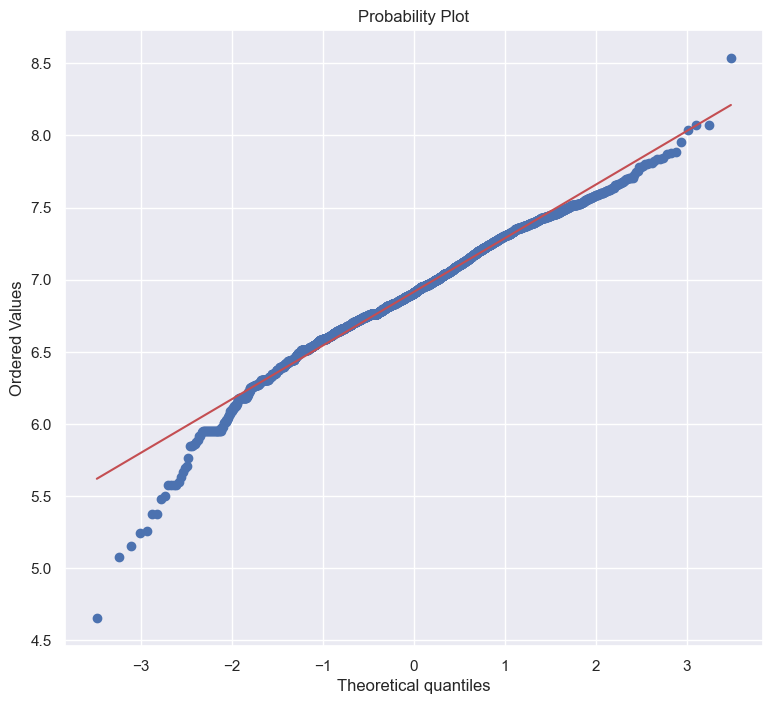

In [34]:
#new variable column, only one as it's binary categorical feature
#if area>0, we get 1. if area==0, we get 0
all_data['HasBsmt'] = pd.Series(len(all_data['TotalBsmtSF']), index=all_data.index)
all_data['HasBsmt'] = 0 
all_data.loc[all_data['TotalBsmtSF']>0,'HasBsmt'] = 1

#transforming data
all_data.loc[all_data['HasBsmt']==1,'TotalBsmtSF'] = np.log(all_data['TotalBsmtSF'])

#plotting histogram and normal probability
sns.histplot(all_data[all_data['TotalBsmtSF']>0]['TotalBsmtSF'], bins=100, kde = True)
fig = plt.figure(figsize=(9, 8))
res = stats.probplot(all_data[all_data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

#removing HasBsmt
all_data.drop(["HasBsmt"], axis=1, inplace=True)

New training and testing set

In [35]:
train_df = all_data[:ntrain]
train_df["SalePrice"] = y_train_df.values
test_df = all_data[ntrain:]

/var/folders/vx/4m9qq3jx4nx9zym2r74lm2rh0000gn/T/ipykernel_76742/3430469577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["SalePrice"] = y_train_df.values


Splitting dataset for train and test

In [36]:

from sklearn.model_selection import train_test_split
x = train_df.iloc[:, :-1]
y = train_df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Multiple Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train.values, y_train.values)
y_pred = pd.DataFrame(linear_regressor.predict(x_test.values), columns = ['SalePrice'])
y_pred['exp_SalePrice'] = np.exp(y_pred['SalePrice'])
y_pred.exp_SalePrice = y_pred.exp_SalePrice.round()
y_test = y_test.to_frame()
y_test['exp_SalePrice'] = np.exp(y_test['SalePrice'])
y_test.exp_SalePrice = y_test.exp_SalePrice.round()

In [38]:
from sklearn import metrics

performance = pd.DataFrame(columns = ['Regressor','MAE','MSE','RMSE'])

def error(y_test, y_pred, classifier, performance_df):
    # Mean Absolute Error
    mae = metrics.mean_absolute_error(y_test, y_pred)
        
    # Mean Squared Error
    mse = metrics.mean_squared_error(y_test, y_pred)
    
    # Root Mean Squared Error
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

    perfData = pd.DataFrame([[classifier, mae, mse, rmse]], columns = ['Regressor','MAE','MSE','RMSE'])
    performance = pd.concat([performance_df, perfData],ignore_index=True)
    return performance

performance = error(y_test['SalePrice'], y_pred['SalePrice'], 'MLR', performance)
performance

,Regressor,MAE,MSE,RMSE
0,MLR,0.081,0.012,0.108


### Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(x_train.values, y_train.values)
y_pred_rfr = regressor.predict(x_test.values)

performance = error(y_test['SalePrice'], y_pred_rfr, 'RFR', performance)
performance

,Regressor,MAE,MSE,RMSE
0,MLR,0.081,0.012,0.108
1,RFR,0.093,0.015,0.124


lasso and ridge regularization methods

In [40]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

#cross validation
def rmse_cv(model):
    mae = -cross_val_score(model, x_train, y_train, scoring="neg_mean_absolute_error", cv = 5).mean()
    mse = -cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = 5).mean()
    rmse= -cross_val_score(model, x_train, y_train, scoring="neg_root_mean_squared_error", cv = 5).mean()

    return [mae, mse, rmse]

model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

for alpha in alphas:
    errors = rmse_cv(Ridge(alpha = alpha))
    perfData = pd.DataFrame([[("ridge_"+str(alpha)), errors[0], errors[1], errors[2]]], columns = ['Regressor','MAE','MSE','RMSE'])
    performance = pd.concat([performance, perfData],ignore_index=True)


performance



,Regressor,MAE,MSE,RMSE
0,MLR,0.081,0.012,0.108
1,RFR,0.093,0.015,0.124
2,ridge_0.05,0.092,0.018,0.134
3,ridge_0.1,0.091,0.018,0.133
4,ridge_0.3,0.090,0.017,0.130
5,ridge_1,0.087,0.016,0.127
6,ridge_3,0.086,0.016,0.124
7,ridge_5,0.085,0.015,0.124
8,ridge_10,0.085,0.015,0.123
9,ridge_15,0.085,0.015,0.123


In [41]:
cv_ridge = pd.Series(performance.iloc[2:,3].tolist(), index = alphas, )

Text(0, 0.5, 'rmse')

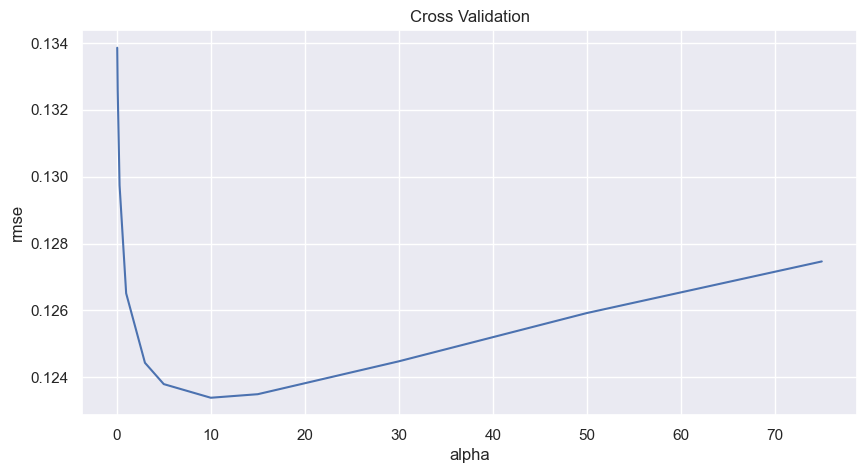

In [42]:
plt.figure(figsize=(10,5))
cv_ridge.plot(title = "Cross Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

we get alpha of 10 as best.

In [43]:
cv_ridge.min()

0.1233832638031181

Lasso model already has alpha section

In [44]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(x_train, y_train)


errors = rmse_cv(model_lasso)
perfData = pd.DataFrame([["Lasso", errors[0], errors[1], errors[2]]], columns = ['Regressor','MAE','MSE','RMSE'])
performance = pd.concat([performance, perfData],ignore_index=True)
performance

,Regressor,MAE,MSE,RMSE
0,MLR,0.081,0.012,0.108
1,RFR,0.093,0.015,0.124
2,ridge_0.05,0.092,0.018,0.134
3,ridge_0.1,0.091,0.018,0.133
4,ridge_0.3,0.090,0.017,0.130
5,ridge_1,0.087,0.016,0.127
6,ridge_3,0.086,0.016,0.124
7,ridge_5,0.085,0.015,0.124
8,ridge_10,0.085,0.015,0.123
9,ridge_15,0.085,0.015,0.123


### Gradient Boosting

using xgboost model

In [45]:
import xgboost as xgb

In [46]:
dtrain = xgb.DMatrix(x_train, label = y_train)
dtest = xgb.DMatrix(x_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain, num_boost_round=500, early_stopping_rounds=100)

<AxesSubplot:>

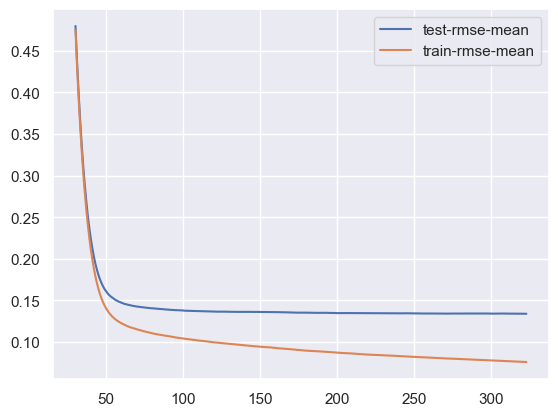

In [47]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [48]:
#online guide parameters
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) 
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=360, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


<AxesSubplot:xlabel='xgb', ylabel='MLR'>

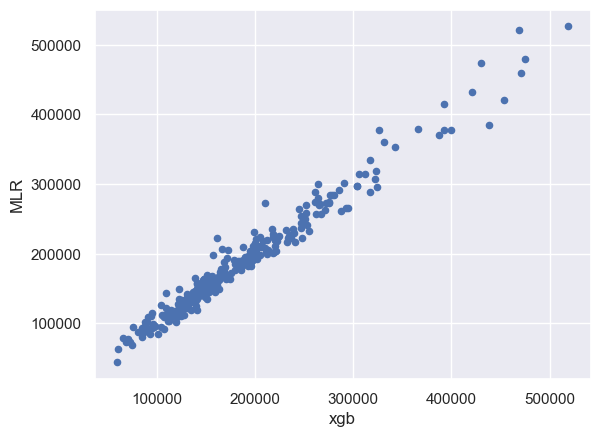

In [49]:
xgb_preds = np.exp(model_xgb.predict(x_test))
mlr_preds = np.exp(linear_regressor.predict(x_test))
predictions = pd.DataFrame({"xgb":xgb_preds, "MLR":mlr_preds})
predictions.plot(x = "xgb", y = "MLR", kind = "scatter")

In [50]:
errors = rmse_cv(model_xgb)
perfData = pd.DataFrame([["XGB_CV", errors[0], errors[1], errors[2]]], columns = ['Regressor','MAE','MSE','RMSE'])
performance = pd.concat([performance, perfData],ignore_index=True)
performance

,Regressor,MAE,MSE,RMSE
0,MLR,0.081,0.012,0.108
1,RFR,0.093,0.015,0.124
2,ridge_0.05,0.092,0.018,0.134
3,ridge_0.1,0.091,0.018,0.133
4,ridge_0.3,0.090,0.017,0.130
5,ridge_1,0.087,0.016,0.127
6,ridge_3,0.086,0.016,0.124
7,ridge_5,0.085,0.015,0.124
8,ridge_10,0.085,0.015,0.123
9,ridge_15,0.085,0.015,0.123


In [51]:
performance = error(y_test['SalePrice'], model_xgb.predict(x_test), 'XGB', performance)
performance

,Regressor,MAE,MSE,RMSE
0,MLR,0.081,0.012,0.108
1,RFR,0.093,0.015,0.124
2,ridge_0.05,0.092,0.018,0.134
3,ridge_0.1,0.091,0.018,0.133
4,ridge_0.3,0.090,0.017,0.130
5,ridge_1,0.087,0.016,0.127
6,ridge_3,0.086,0.016,0.124
7,ridge_5,0.085,0.015,0.124
8,ridge_10,0.085,0.015,0.123
9,ridge_15,0.085,0.015,0.123


In [52]:
performance = performance.sort_values(by = ["RMSE"], ascending = True)
performance

,Regressor,MAE,MSE,RMSE
0,MLR,0.081,0.012,0.108
15,XGB,0.086,0.013,0.114
8,ridge_10,0.085,0.015,0.123
9,ridge_15,0.085,0.015,0.123
7,ridge_5,0.085,0.015,0.124
1,RFR,0.093,0.015,0.124
6,ridge_3,0.086,0.016,0.124
10,ridge_30,0.086,0.016,0.124
13,Lasso,0.087,0.016,0.125
11,ridge_50,0.087,0.016,0.126


taking weighted average to combine MLR and XGB

In [53]:
xgb_preds =  model_xgb.predict(x_test)
mlr_preds = linear_regressor.predict(x_test)
preds = 0.7*mlr_preds + 0.3*xgb_preds

performance = error(y_test['SalePrice'], preds, 'wAvg MLR + XGB', performance).sort_values(by = ["RMSE"], ascending = True)
performance

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,Regressor,MAE,MSE,RMSE
16,wAvg MLR + XGB,0.078,0.011,0.104
0,MLR,0.081,0.012,0.108
1,XGB,0.086,0.013,0.114
2,ridge_10,0.085,0.015,0.123
3,ridge_15,0.085,0.015,0.123
4,ridge_5,0.085,0.015,0.124
5,RFR,0.093,0.015,0.124
6,ridge_3,0.086,0.016,0.124
7,ridge_30,0.086,0.016,0.124
8,Lasso,0.087,0.016,0.125


### final price predictions

In [54]:
xgb_preds = np.exp(model_xgb.predict(test_df))
mlr_preds = np.exp(linear_regressor.predict(test_df))
preds = 0.7*mlr_preds + 0.3*xgb_preds

solution = pd.DataFrame({"id":test_ID, "SalePrice":preds})
solution.to_csv("basil_sol.csv", index = False)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
